In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**Data Preperation**

In [2]:
# Loading the MNIST dataset from OpenML
mnist= fetch_openml('mnist_784',version=1, as_frame=True)
X,y = mnist['data'],mnist['target']

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [4]:
X.head(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Converting target labels as integers:-
y = y.astype(int)

In [ ]:
# Splitting the data into train and test dataset:-
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Standarize the features (pixel value):-
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Data Visualization**

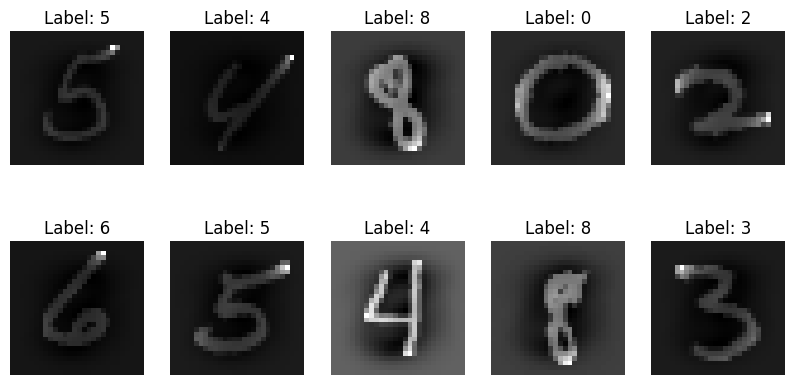

In [ ]:
# visualizing a few sample images:-
fig, axes= plt.subplots(nrows=2,ncols=5,figsize=(10,5))
for i, ax in enumerate(axes.flat):
  ax.imshow(X_train[i].reshape(28,28), cmap='gray')
  ax.set_title(f"Label: {y_train.iloc[i]}")
  ax.axis('off')
plt.show()

**Model Selection and Training**

In [ ]:
# Will be using Multi-Layer Perceptron(MLP) classifier as the model
model= MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1000, random_state=42)


In [ ]:
# Train the model on the training data::-
model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1000, random_state=42)

**Model Evaluation**

In [ ]:
# Predict on the test set:-
y_pred= model.predict(X_test)

In [ ]:
# Printing the classification report and confusion matrix:-
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.98      0.99      0.99      1600
           2       0.97      0.97      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.98      0.98      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.99      0.98      1396
           7       0.97      0.98      0.98      1503
           8       0.97      0.96      0.96      1357
           9       0.97      0.96      0.97      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000

Confusion Matrix:
 [[1321    1    3    0    0    2    8    1    5    2]
 [   0 1590    2    1    1    1    0    5    0    0]
 [   2    8 1341    4    5    2    3    7    6    2]
 [   2    1   10 1391    1   12    0   

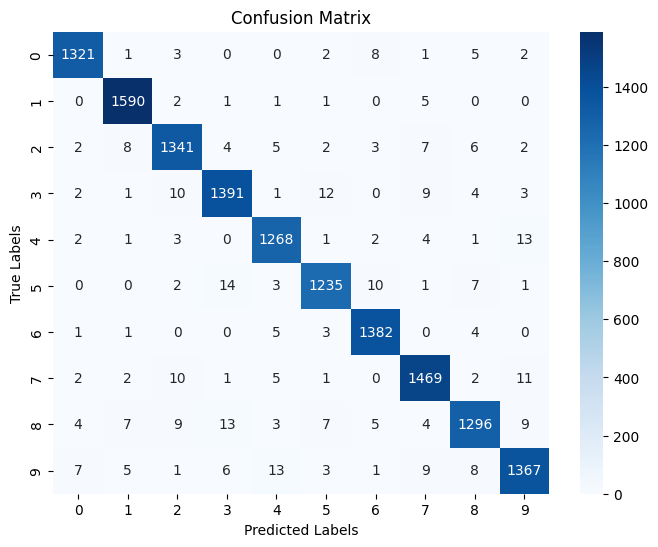

In [ ]:
# Visualizing the confusion matrix using a heatmap:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**Sample Test**

In [ ]:
# Getting a sample set from the test data:-
sample_index = np.random.randint(0, len(X_test))
sample_image = X_test[sample_index]
sample_label = y_test.iloc[sample_index]

In [ ]:
# Predict the label for the sample image:
predicted_label = model.predict([sample_image])[0]

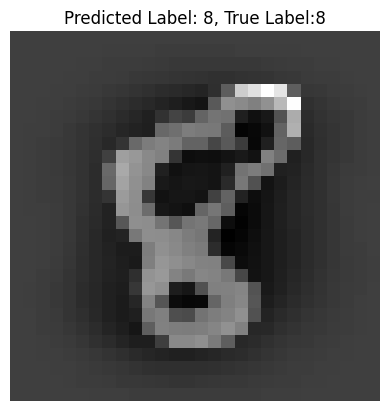

In [ ]:
# Displaing the sample image and the predicted label:
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predicted_label}, True Label:{sample_label}")
plt.axis('off')
plt.show()